# Exploratory Data Analysis and Clustering
## Driver-Route Matching System

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

## 1. Load and Explore Data

In [286]:
# Load datasets
drivers_df = pd.read_csv('../data/drivers_mock.csv')
routes_df = pd.read_csv('../data/routes_mock.csv')

print(f'Drivers dataset: {drivers_df.shape}')
print(f'Routes dataset: {routes_df.shape}')


Drivers dataset: (350, 14)
Routes dataset: (150, 11)


### 1.1 Drivers Analysis

In [287]:
drivers_df.head()

,driver_id,dispatch_compliance,route_deviations,unauthorized_stops,driven_km,eta_difference,unplanned_absences,carbon_footprint,driving_aggressiveness,energy_efficiency,safety_score,efficiency_score,compliance_score,driver_score_base
0,DRV00001,85.93,5.03,2,12050.0,-7.88,3,3343.89,40.72,81.84,71.73,67.95,78.94,72.21
1,DRV00002,83.58,9.55,0,19221.0,15.45,0,2350.49,31.57,80.33,71.42,68.76,82.24,73.19
2,DRV00003,81.84,2.05,1,14125.0,-15.96,3,1959.01,30.13,98.16,83.87,77.94,79.88,80.79
3,DRV00004,72.28,1.34,2,9651.0,-11.85,0,1624.51,43.87,77.38,78.16,74.10,84.80,78.40
4,DRV00005,97.48,3.42,0,8677.0,3.53,4,2029.48,39.65,70.54,81.26,73.92,83.32,79.21


In [288]:
# Statistical drivers summary
drivers_df.describe()

,dispatch_compliance,route_deviations,unauthorized_stops,driven_km,eta_difference,unplanned_absences,carbon_footprint,driving_aggressiveness,energy_efficiency,safety_score,efficiency_score,compliance_score,driver_score_base
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,79.691914,4.066114,1.522857,15023.311429,0.144086,1.994286,2458.872714,30.743029,81.166686,78.076000,70.908829,79.796971,75.997457
std,11.253479,2.787347,1.290607,4914.294110,14.100692,1.401993,790.479920,16.525281,13.742565,8.628971,8.870942,7.284503,5.546539
min,46.140000,0.090000,0.000000,5000.000000,-43.500000,0.000000,1000.000000,1.160000,41.530000,47.500000,28.440000,55.370000,55.380000
25%,73.025000,1.990000,1.000000,11891.000000,-9.535000,1.000000,1923.077500,16.792500,72.602500,72.882500,65.177500,75.482500,72.467500
50%,81.285000,3.415000,1.000000,15131.000000,-1.460000,2.000000,2427.220000,29.275000,81.780000,79.265000,71.360000,80.425000,75.935000
75%,88.272500,5.455000,2.000000,18275.500000,9.845000,3.000000,3002.375000,42.455000,92.710000,84.270000,77.632500,84.807500,80.262500
max,98.670000,15.570000,7.000000,28225.000000,37.520000,6.000000,4610.160000,74.770000,100.000000,95.070000,91.840000,96.460000,87.190000


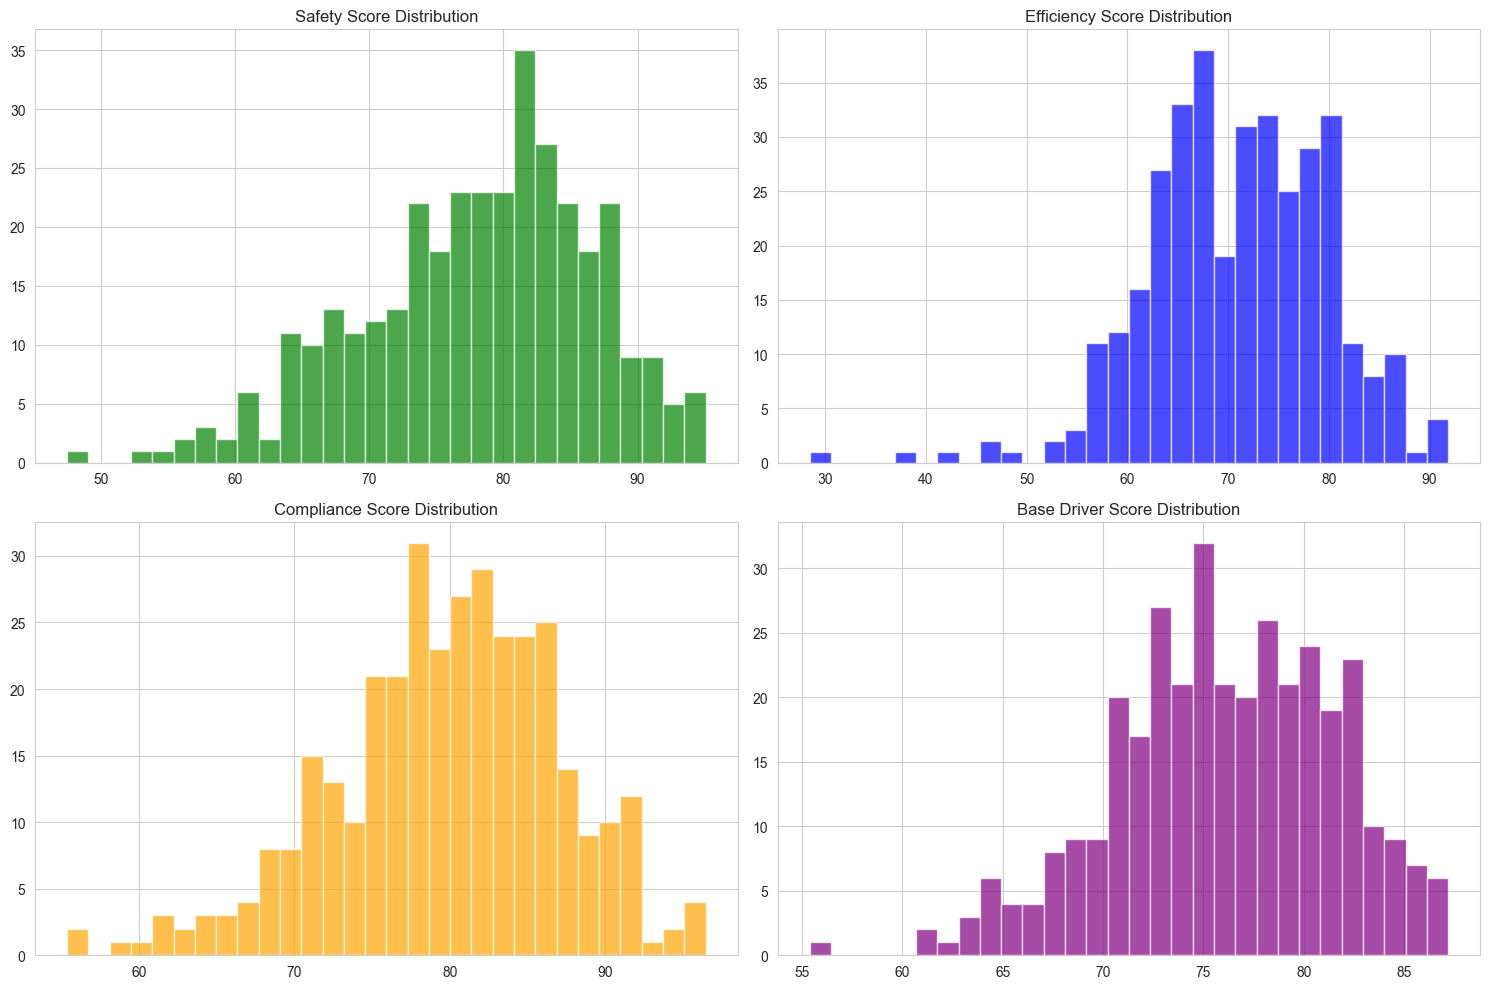

In [289]:
# Score distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].hist(drivers_df['safety_score'], bins=30, color='green', alpha=0.7)
axes[0, 0].set_title('Safety Score Distribution')
axes[0, 1].hist(drivers_df['efficiency_score'], bins=30, color='blue', alpha=0.7)
axes[0, 1].set_title('Efficiency Score Distribution')
axes[1, 0].hist(drivers_df['compliance_score'], bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('Compliance Score Distribution')
axes[1, 1].hist(drivers_df['driver_score_base'], bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title('Base Driver Score Distribution')
plt.tight_layout()
plt.show()

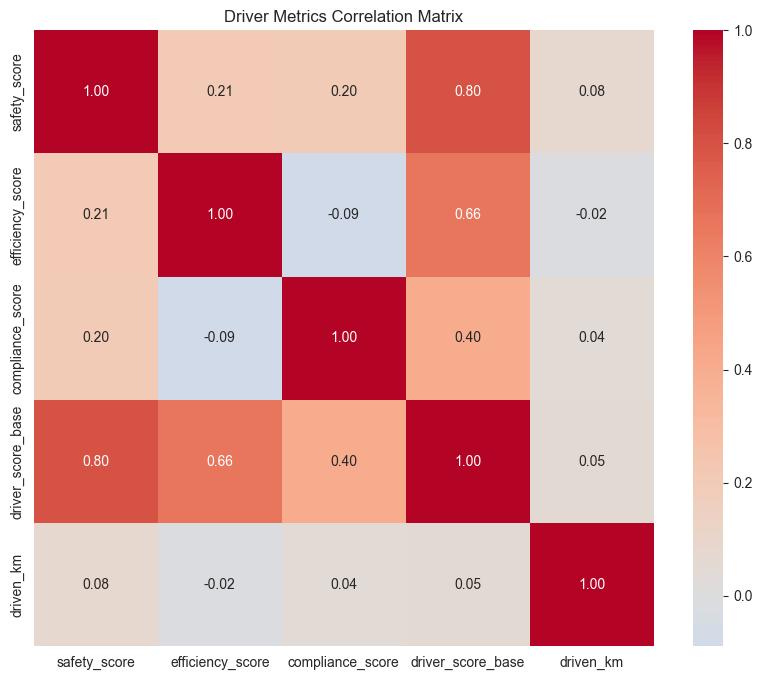

In [290]:
# Correlation heatmap
driver_score_cols = ['safety_score', 'efficiency_score', 'compliance_score', 'driver_score_base', 'driven_km']
plt.figure(figsize=(10, 8))
sns.heatmap(drivers_df[driver_score_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Driver Metrics Correlation Matrix')
plt.show()

### Routes Analysis

In [291]:
routes_df.head()

,route_id,total_distance_km,avg_speed_kmh,navigation_steps_count,avg_compliance_index,time_variability_min,normalized_breakdown_rate,fuel_efficiency_lt_km,peligrosity_score,efficiency_score,operational_complexity_score
0,RTE0001,377.09,72.88,11,1.415,29.87,0.1017,0.411,25.20,48.99,21.29
1,RTE0002,436.52,81.65,6,1.368,18.88,0.0667,0.292,18.79,60.58,15.91
2,RTE0003,517.04,67.17,34,1.274,27.94,0.0962,0.418,26.41,51.73,21.80
3,RTE0004,897.66,45.58,72,1.362,40.86,0.1545,0.342,41.49,46.31,35.38
4,RTE0005,238.84,74.37,7,1.130,35.68,0.1003,0.407,24.95,59.70,15.07


In [292]:
# Statistical routes summary
routes_df.describe()

,total_distance_km,avg_speed_kmh,navigation_steps_count,avg_compliance_index,time_variability_min,normalized_breakdown_rate,fuel_efficiency_lt_km,peligrosity_score,efficiency_score,operational_complexity_score
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000
mean,487.689000,69.462600,24.793333,1.366240,30.521867,0.109457,0.347020,27.612600,53.466800,23.01700
std,230.575297,12.660451,18.437013,0.117048,7.826323,0.017915,0.056174,5.416108,9.003577,6.64765
min,79.750000,34.760000,5.000000,1.064000,9.530000,0.066700,0.220000,15.120000,31.130000,9.81000
25%,317.075000,60.827500,11.250000,1.277250,25.805000,0.096775,0.311000,23.515000,46.940000,18.13500
50%,437.260000,68.435000,20.000000,1.366500,30.160000,0.109600,0.338000,27.385000,53.895000,22.11500
75%,638.957500,79.915000,32.000000,1.448250,35.675000,0.122750,0.378750,31.817500,59.945000,26.60750
max,1136.440000,96.260000,96.000000,1.645000,51.060000,0.154500,0.509000,41.490000,78.820000,45.78000


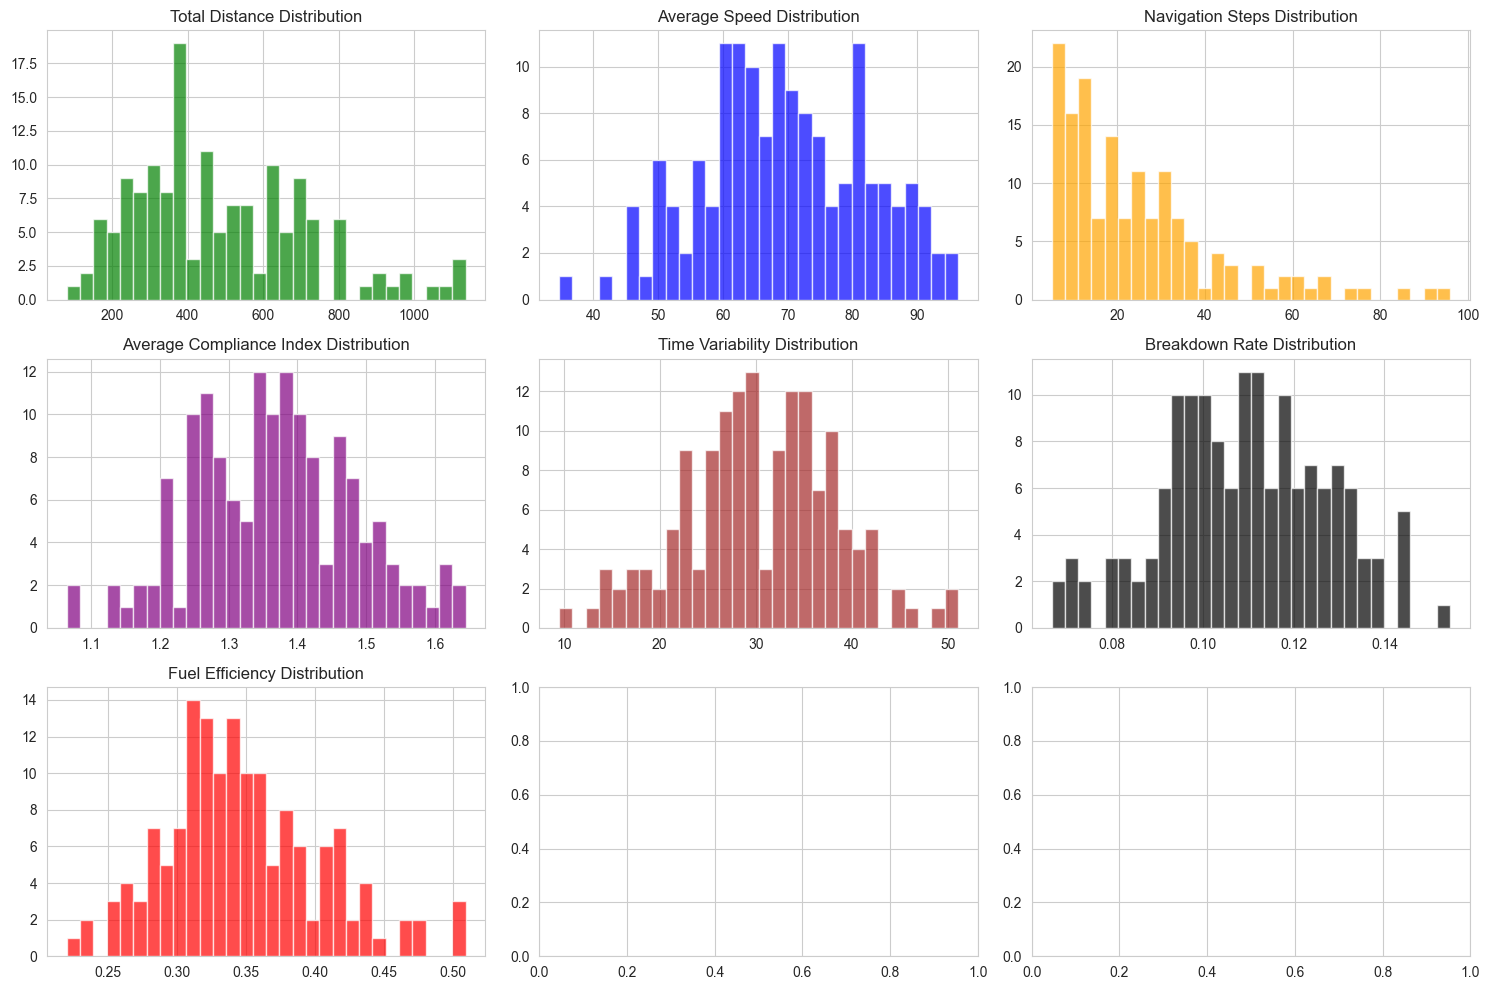

In [293]:
# Score distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes[0, 0].hist(routes_df['total_distance_km'], bins=30, color='green', alpha=0.7)
axes[0, 0].set_title('Total Distance Distribution')
axes[0, 1].hist(routes_df['avg_speed_kmh'], bins=30, color='blue', alpha=0.7)
axes[0, 1].set_title('Average Speed Distribution')
axes[0, 2].hist(routes_df['navigation_steps_count'], bins=30, color='orange', alpha=0.7)
axes[0, 2].set_title('Navigation Steps Distribution')
axes[1, 0].hist(routes_df['avg_compliance_index'], bins=30, color='purple', alpha=0.7)
axes[1, 0].set_title('Average Compliance Index Distribution')
axes[1, 1].hist(routes_df['time_variability_min'], bins=30, color='brown', alpha=0.7)
axes[1, 1].set_title('Time Variability Distribution')
axes[1, 2].hist(routes_df['normalized_breakdown_rate'], bins=30, color='black', alpha=0.7)
axes[1, 2].set_title('Breakdown Rate Distribution')
axes[2, 0].hist(routes_df['fuel_efficiency_lt_km'], bins=30, color='red', alpha=0.7)
axes[2, 0].set_title('Fuel Efficiency Distribution')


plt.tight_layout()
plt.show()

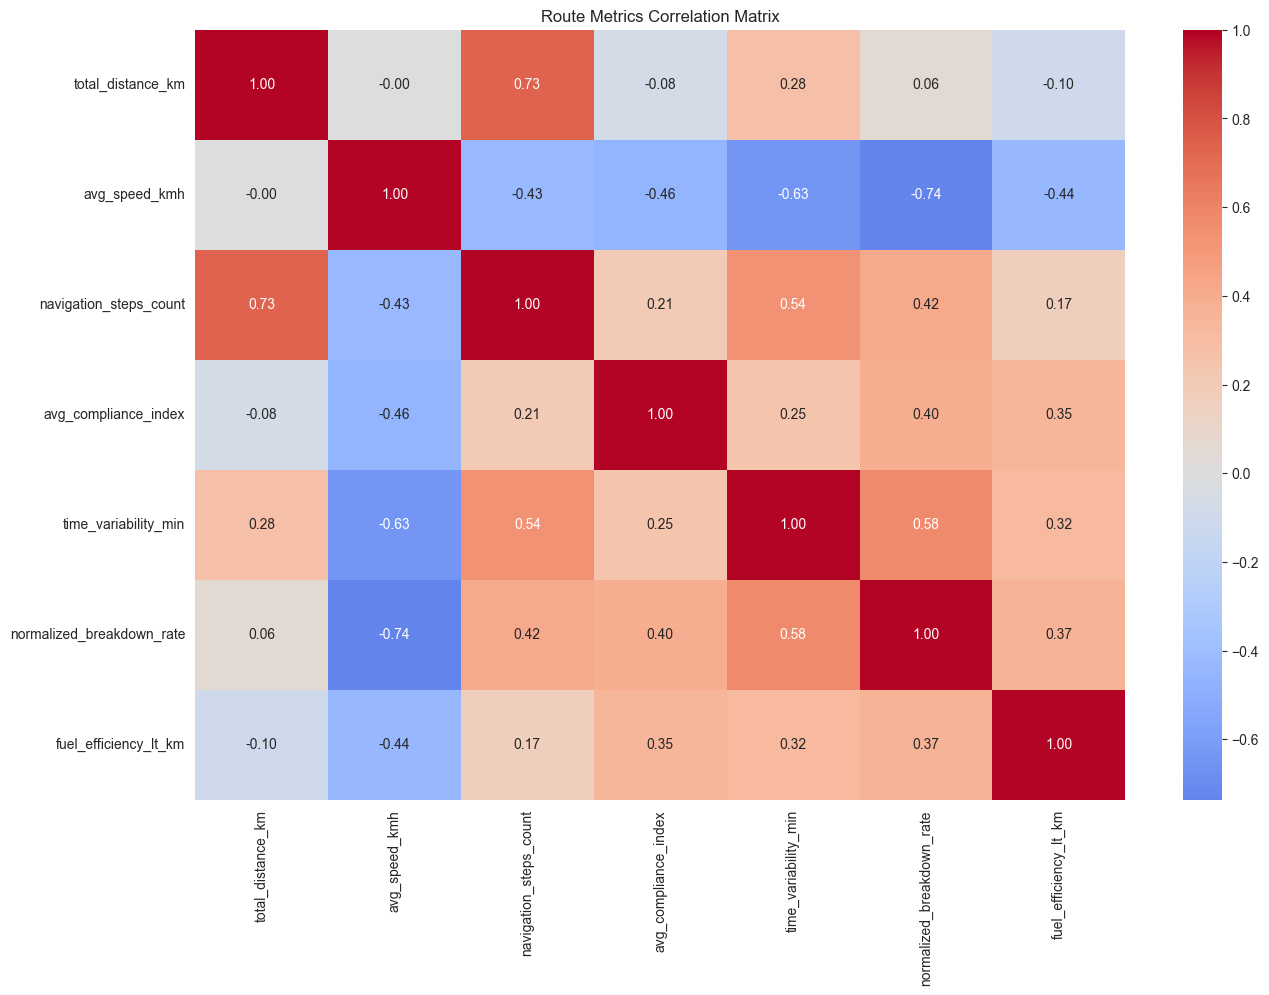

In [294]:
# Correlation heatmap
route_score_cols = ['total_distance_km', 'avg_speed_kmh', 'navigation_steps_count', 'avg_compliance_index', 'time_variability_min', 'normalized_breakdown_rate', 'fuel_efficiency_lt_km']
plt.figure(figsize=(15, 10))
sns.heatmap(routes_df[route_score_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Route Metrics Correlation Matrix')
plt.show()

## 2. Driver Clustering

In [295]:
# Prepare features
driver_features = ['safety_score', 'efficiency_score', 'compliance_score', 'driving_aggressiveness', 'energy_efficiency', 'driven_km']
X_drivers = drivers_df[driver_features].values
scaler_drivers = StandardScaler()
X_drivers_scaled = scaler_drivers.fit_transform(X_drivers)
print('Driver features shape:', X_drivers_scaled.shape)

Driver features shape: (350, 6)


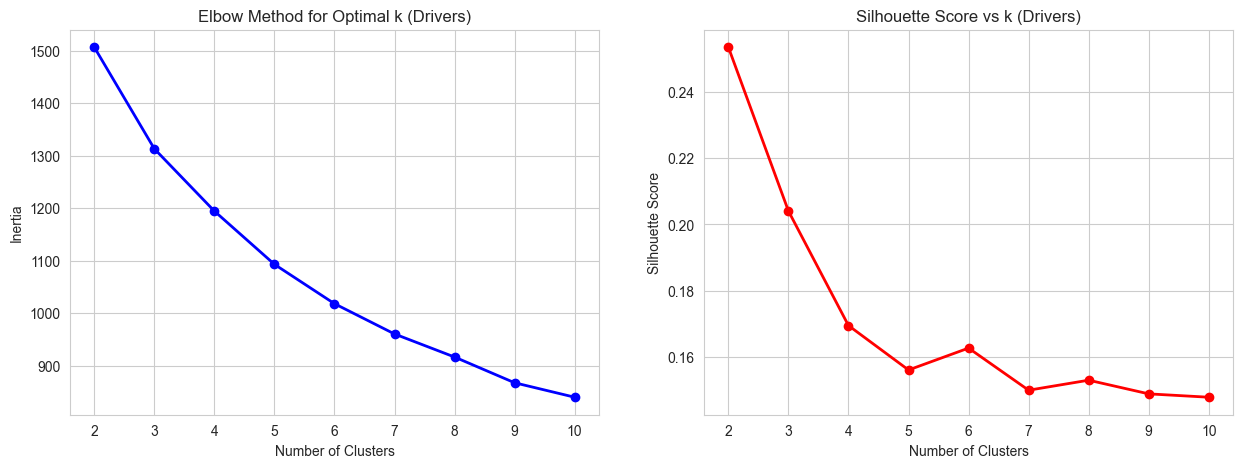

Optimal k: 2, Silhouette: 0.254


In [296]:
# Elbow method and silhouette score
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_drivers_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_drivers_scaled, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(K_range, inertias, 'bo-', linewidth=2)
axes[0].set_title('Elbow Method for Optimal k (Drivers)')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2)
axes[1].set_title('Silhouette Score vs k (Drivers)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
plt.show()

optimal_k_drivers = K_range[np.argmax(silhouette_scores)]
print(f'Optimal k: {optimal_k_drivers}, Silhouette: {max(silhouette_scores):.3f}')

In [297]:
# Apply K-Means clustering
kmeans_drivers = KMeans(n_clusters=optimal_k_drivers, random_state=42, n_init=10)
drivers_df['cluster'] = kmeans_drivers.fit_predict(X_drivers_scaled)

print(f'Clustering completed with k={optimal_k_drivers}')
print('\nCluster distribution:')
print(drivers_df['cluster'].value_counts().sort_index())

Clustering completed with k=2

Cluster distribution:
cluster
0    206
1    144
Name: count, dtype: int64


In [298]:
# Cluster profiles
print('=== DRIVER CLUSTER PROFILES ===')
cluster_profiles = drivers_df.groupby('cluster')[driver_features + ['driver_score_base']].mean()
cluster_profiles.round(2)

=== DRIVER CLUSTER PROFILES ===


,safety_score,efficiency_score,compliance_score,driving_aggressiveness,energy_efficiency,driven_km,driver_score_base
cluster,,,,,,,
0,82.44,74.52,79.94,20.16,89.11,15642.94,79.04
1,71.83,65.74,79.60,45.88,69.81,14136.90,71.64


In [299]:
# Cluster interpretations
print('=== CLUSTER INTERPRETATIONS ===')
for cluster_id in range(optimal_k_drivers):
    profile = cluster_profiles.loc[cluster_id]
    count = len(drivers_df[drivers_df['cluster'] == cluster_id])
    print(f'\nCluster {cluster_id}: {count} drivers')
    print(f'  Safety: {profile["safety_score"]:.1f}')
    print(f'  Efficiency: {profile["efficiency_score"]:.1f}')
    print(f'  Compliance: {profile["compliance_score"]:.1f}')
    print(f'  Driving Aggressiveness: {profile["driving_aggressiveness"]:.1f}')
    print(f'  Energy Efficiency: {profile["energy_efficiency"]:.1f}')
    print(f'  Driven KM: {profile["driven_km"]:.1f}')
    print(f'  Driver Score Base: {profile["driver_score_base"]:.1f}')

=== CLUSTER INTERPRETATIONS ===

Cluster 0: 206 drivers
  Safety: 82.4
  Efficiency: 74.5
  Compliance: 79.9
  Driving Aggressiveness: 20.2
  Energy Efficiency: 89.1
  Driven KM: 15642.9
  Driver Score Base: 79.0

Cluster 1: 144 drivers
  Safety: 71.8
  Efficiency: 65.7
  Compliance: 79.6
  Driving Aggressiveness: 45.9
  Energy Efficiency: 69.8
  Driven KM: 14136.9
  Driver Score Base: 71.6


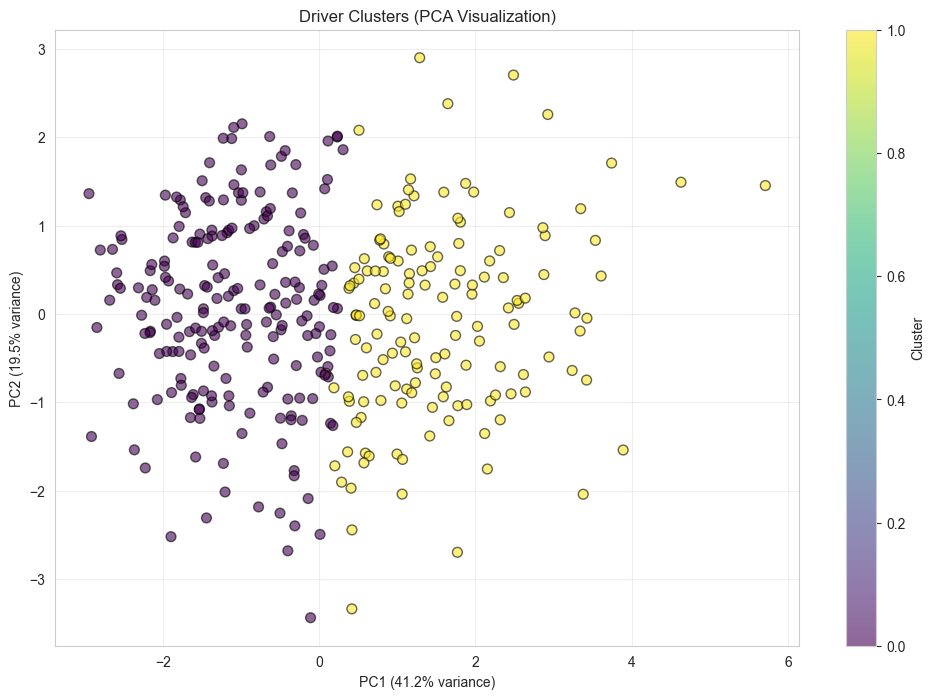

In [300]:
# PCA visualization
pca = PCA(n_components=2, random_state=42)
X_drivers_pca = pca.fit_transform(X_drivers_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_drivers_pca[:, 0], X_drivers_pca[:, 1], c=drivers_df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Driver Clusters (PCA Visualization)')
plt.grid(True, alpha=0.3)
plt.show()

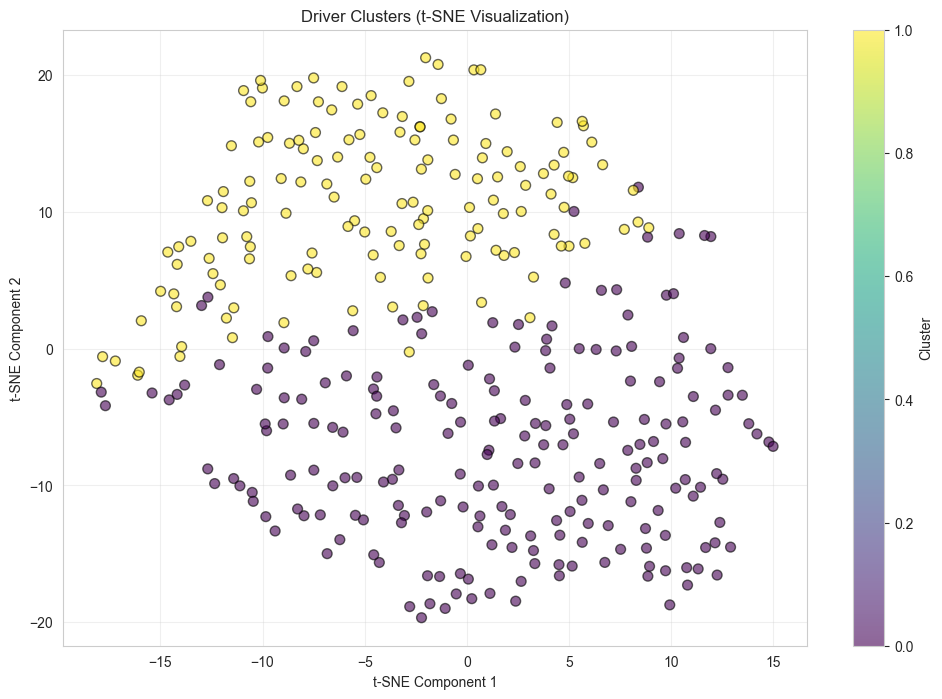

In [301]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_drivers_tsne = tsne.fit_transform(X_drivers_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_drivers_tsne[:, 0], X_drivers_tsne[:, 1], c=drivers_df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Driver Clusters (t-SNE Visualization)')
plt.grid(True, alpha=0.3)
plt.show()

## 3. Route Clustering

In [302]:
# Prepare features
route_features = ['total_distance_km', 'avg_speed_kmh', 'navigation_steps_count', 'avg_compliance_index', 'time_variability_min', 'normalized_breakdown_rate', 'fuel_efficiency_lt_km']
X_routes = routes_df[route_features].values
scaler_routes = StandardScaler()
X_routes_scaled = scaler_routes.fit_transform(X_routes)
print('Route features shape:', X_routes_scaled.shape)

Route features shape: (150, 7)


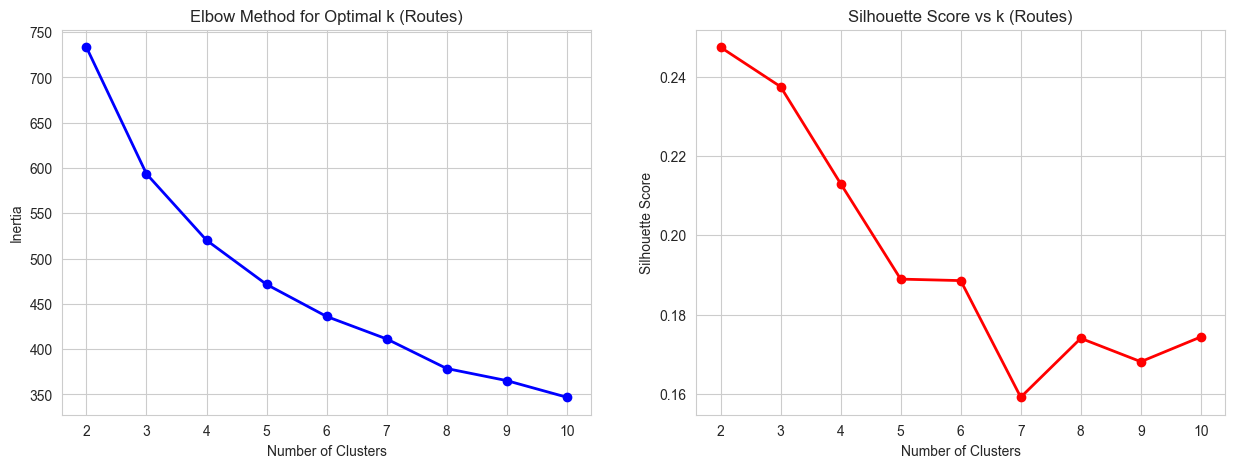

Optimal k: 2, Silhouette: 0.247


In [303]:
# Elbow method
inertias_routes = []
silhouette_scores_routes = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_routes_scaled)
    inertias_routes.append(kmeans.inertia_)
    silhouette_scores_routes.append(silhouette_score(X_routes_scaled, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(K_range, inertias_routes, 'bo-', linewidth=2)
axes[0].set_title('Elbow Method for Optimal k (Routes)')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[1].plot(K_range, silhouette_scores_routes, 'ro-', linewidth=2)
axes[1].set_title('Silhouette Score vs k (Routes)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
plt.show()

optimal_k_routes = K_range[np.argmax(silhouette_scores_routes)]
print(f'Optimal k: {optimal_k_routes}, Silhouette: {max(silhouette_scores_routes):.3f}')

In [304]:
# Apply clustering
kmeans_routes = KMeans(n_clusters=optimal_k_routes, random_state=42, n_init=10)
routes_df['cluster'] = kmeans_routes.fit_predict(X_routes_scaled)

print(f'Route clustering completed with k={optimal_k_routes}')
print('\nCluster distribution:')
print(routes_df['cluster'].value_counts().sort_index())

Route clustering completed with k=2

Cluster distribution:
cluster
0    70
1    80
Name: count, dtype: int64


In [305]:
# Cluster profiles
print('=== ROUTE CLUSTER PROFILES ===')
cluster_profiles_routes = routes_df.groupby('cluster')[route_features].mean()
cluster_profiles_routes.round(2)

=== ROUTE CLUSTER PROFILES ===


,total_distance_km,avg_speed_kmh,navigation_steps_count,avg_compliance_index,time_variability_min,normalized_breakdown_rate,fuel_efficiency_lt_km
cluster,,,,,,,
0,444.95,79.64,15.19,1.31,25.43,0.10,0.32
1,525.08,60.56,33.20,1.42,34.98,0.12,0.37


In [306]:
# Cluster interpretations
print('=== CLUSTER INTERPRETATIONS ===')
for cluster_id in range(optimal_k_routes):
    profile = cluster_profiles_routes.loc[cluster_id]
    count = len(routes_df[routes_df['cluster'] == cluster_id])
    print(f'\nCluster {cluster_id}: {count} routes')
    print(f'  Total Distance: {profile["total_distance_km"]:.1f}')
    print(f'  Average Speed: {profile["avg_speed_kmh"]:.1f}')
    print(f'  Navigation Steps Count: {profile["navigation_steps_count"]:.1f}')
    print(f'  Average Compliance Index: {profile["avg_compliance_index"]:.1f}')
    print(f'  Time Variability: {profile["time_variability_min"]:.1f}')
    print(f'  Normalized Breakdown Rate: {profile["normalized_breakdown_rate"]:.1f}')
    print(f'  Fuel Efficiency: {profile["fuel_efficiency_lt_km"]:.1f}')

=== CLUSTER INTERPRETATIONS ===

Cluster 0: 70 routes
  Total Distance: 445.0
  Average Speed: 79.6
  Navigation Steps Count: 15.2
  Average Compliance Index: 1.3
  Time Variability: 25.4
  Normalized Breakdown Rate: 0.1
  Fuel Efficiency: 0.3

Cluster 1: 80 routes
  Total Distance: 525.1
  Average Speed: 60.6
  Navigation Steps Count: 33.2
  Average Compliance Index: 1.4
  Time Variability: 35.0
  Normalized Breakdown Rate: 0.1
  Fuel Efficiency: 0.4


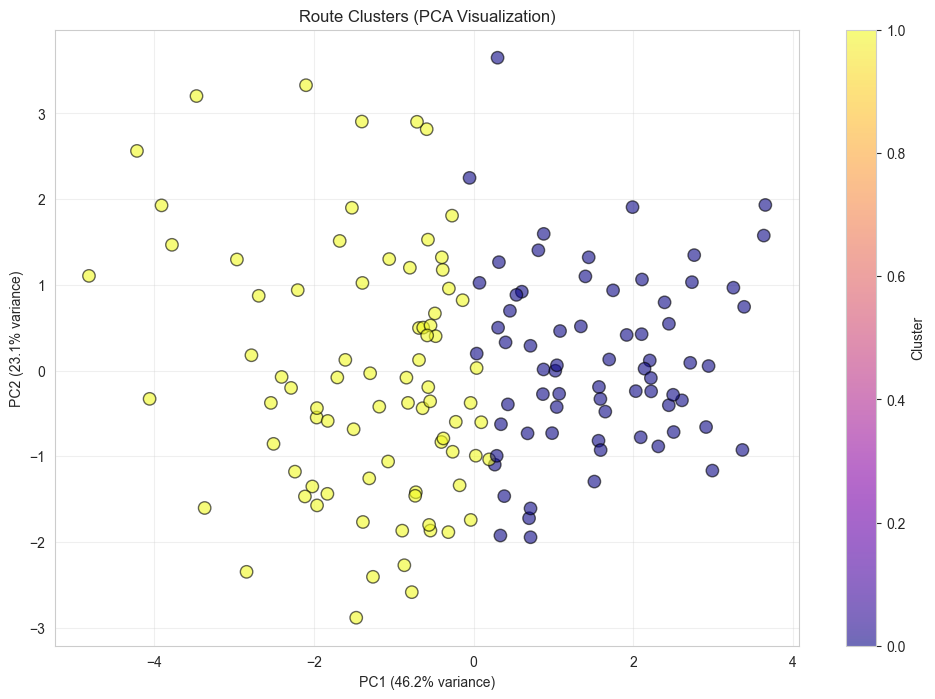

In [307]:
# PCA visualization
pca_routes = PCA(n_components=2, random_state=42)
X_routes_pca = pca_routes.fit_transform(X_routes_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_routes_pca[:, 0], X_routes_pca[:, 1], c=routes_df['cluster'], cmap='plasma', s=80, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca_routes.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_routes.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Route Clusters (PCA Visualization)')
plt.grid(True, alpha=0.3)
plt.show()

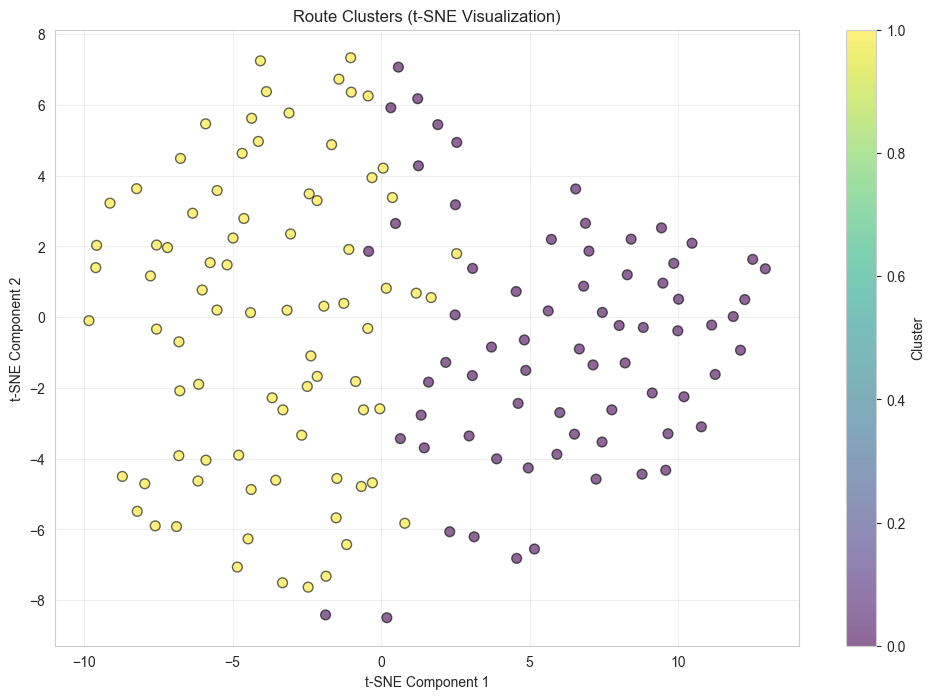

In [308]:
# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_routes_tsne = tsne.fit_transform(X_routes_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_routes_tsne[:, 0], X_routes_tsne[:, 1], c=routes_df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Route Clusters (t-SNE Visualization)')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Save Clustered Data

In [309]:
# Save clustered datasets
drivers_df.to_csv('../data/drivers_clustered.csv', index=False)
routes_df.to_csv('../data/routes_clustered.csv', index=False)
print('✓ Saved clustered datasets')

✓ Saved clustered datasets
